In [134]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# df = sm.datasets.get_rdataset("mpg", "ggplot2").data
df = sns.load_dataset("mpg")

In [136]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [137]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [138]:
y, X = dmatrices("mpg ~ C(cylinders) + displacement + horsepower + weight", data=df, return_type="dataframe")

In [139]:
y.head(3)

,mpg
0,18.0
1,15.0
2,18.0


In [140]:
X.head(3)

,Intercept,C(cylinders)[T.4],C(cylinders)[T.5],C(cylinders)[T.6],C(cylinders)[T.8],displacement,horsepower,weight
0,1.0,0.0,0.0,0.0,1.0,307.0,130.0,3504.0
1,1.0,0.0,0.0,0.0,1.0,350.0,165.0,3693.0
2,1.0,0.0,0.0,0.0,1.0,318.0,150.0,3436.0


In [141]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     157.8
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          7.58e-109
Time:                        12:16:51   Log-Likelihood:                -1095.6
No. Observations:                 392   AIC:                             2207.
Df Residuals:                     384   BIC:                             2239.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            37.6944      2.53

In [142]:
print("Parameters:\n", result.params)
print("R2", result.rsquared)

Parameters:
 Intercept            37.694431
C(cylinders)[T.4]     7.032841
C(cylinders)[T.5]     9.063010
C(cylinders)[T.6]     3.300937
C(cylinders)[T.8]     5.982067
displacement         -0.000127
horsepower           -0.060724
weight               -0.004631
dtype: float64
R2 0.7420803896068666


In [143]:
sm.stats.linear_rainbow(result)

(2.8868298580767506, 4.442919938668905e-13)

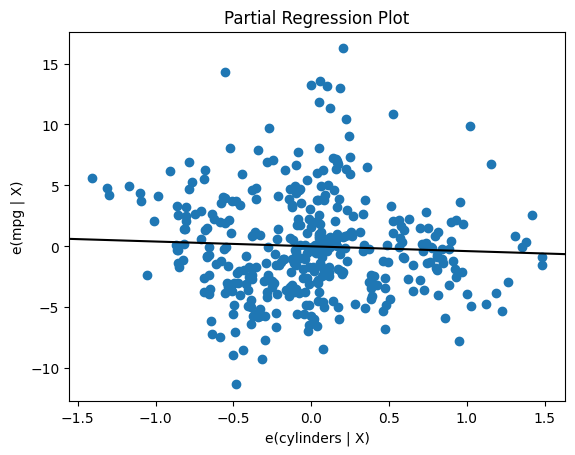

In [144]:
sm.graphics.plot_partregress("mpg", "cylinders", ["displacement", "horsepower", "weight"], data=df, obs_labels=False);

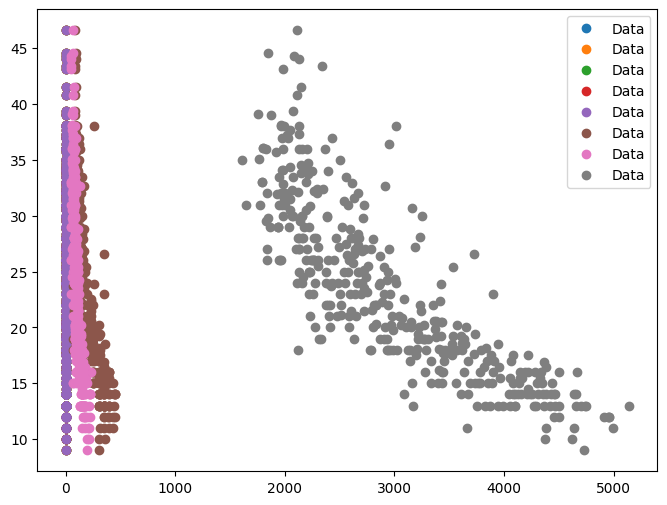

In [145]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, y, "o", label="Data")
# ax.plot(weight, mpg, "o", label="Weight")
legend = ax.legend(loc="best")